<a href="https://colab.research.google.com/github/rajivsresearch/Corona/blob/master/Influenza_vs_Corona.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [0]:
df = pd.read_html('https://www.cdc.gov/flu/weekly/weeklyarchives2019-2020/data/whoAllregt_cl12.html')

In [0]:
flu = df[0]

In [95]:
flu.head()

,Week,Total A,Total B,Percent Positive A,Percent Positive B,Total # Tested,% Positive,Date,New Cases
0,201940,136,124,0.68,0.62,19857,1.30,2019-10-07,258.0
1,201941,146,181,0.66,0.81,22116,1.47,2019-10-14,325.0
2,201942,172,187,0.74,0.80,23141,1.55,2019-10-21,359.0
3,201943,201,354,0.81,1.43,24641,2.25,2019-10-28,554.0
4,201944,221,556,0.86,2.18,25429,3.05,2019-11-04,776.0


In [0]:
flu['Date'] = flu['Week'].apply(lambda x: datetime.datetime.strptime(str(x) + '-1', "%Y%W-%w"))

In [0]:
flu['New Cases'] = round(flu['Total # Tested']*flu['% Positive']/100)

In [0]:
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
df1 = pd.read_csv(url)

In [0]:
f1 = df1['Country/Region'].isin(['US'])

covid = df1.loc[f1,:].drop(['Province/State', 'Lat', 'Long'], axis=1).groupby('Country/Region').sum().T

In [0]:
covid.index = pd.to_datetime(covid.index)

Text(0.5, 1.0, 'Flu vs. Corona Virus')

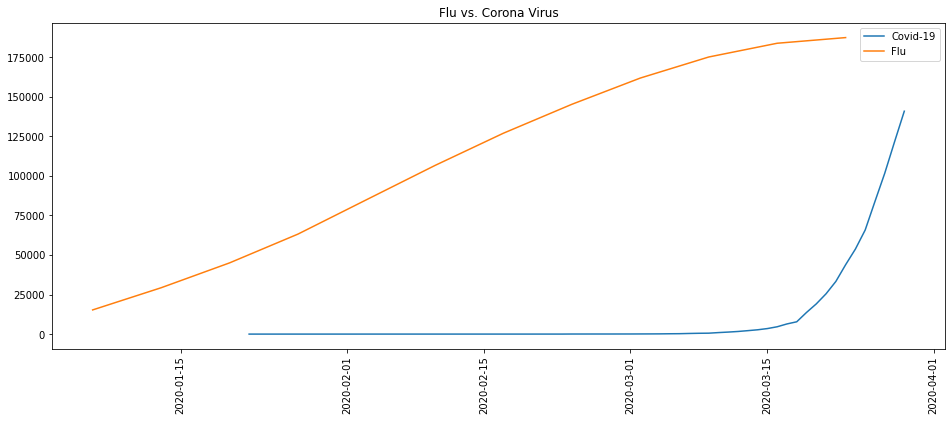

In [101]:
fig, ax = plt.subplots(figsize=(16,6))

plt.plot(data.index, data.values, label='Covid-19')

f2 = flu['Date'] > '2020-01-01'

plt.plot(flu.loc[f2, 'Date'], flu.loc[f2 ,'New Cases'].cumsum(), label='Flu')

plt.xticks(rotation=90)
plt.legend()
plt.title('Flu vs. Corona Virus')